In [ ]:
#  Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
df = pd.read_csv("/content/cocoa_no_company_location.csv")

#  Convert 'Cocoa Percent' to float
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float)

#  One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=['Company', 'Bean Origin'], drop_first=True)

#  Separate features and target
X = df_encoded.drop(columns=['Id', 'Rating (Out of 10)'])
y = df_encoded['Rating (Out of 10)']

# Normalize numeric features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  Build an improved neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output for regression
])

#  Compile the model with additional metric
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1, validation_split=0.1)

#  Evaluate
y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\n R² Score:", round(r2, 4))
print(" Mean Absolute Error (MAE):", round(mae, 4))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 33.7730 - mae: 5.6962 - val_loss: 7.8451 - val_mae: 2.6086
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9691 - mae: 1.6127 - val_loss: 1.2934 - val_mae: 0.8817
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3676 - mae: 0.9379 - val_loss: 1.1712 - val_mae: 0.8291
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0050 - mae: 0.7953 - val_loss: 1.1453 - val_mae: 0.8129
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.8694 - mae: 0.7304 - val_loss: 1.0974 - val_mae: 0.7986
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.7084 - mae: 0.6549 - val_loss: 1.0949 - val_mae: 0.8113
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.6672 - mae: 0.6454 - val_loss: 1.1056 - val_mae: 0.8174
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6038 - mae: 0.6117 - val_loss: 1.0869 - val_mae: 0.8095
Epoch 9/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss:

In [ ]:

# !pip install xgboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error
from xgboost import XGBRegressor

# Step 1: Load the dataset
df = pd.read_csv("/content/cocoa_no_company_location.csv")

# Step 2: Clean and preprocess the data
# Convert 'Cocoa Percent' from percentage string to float
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float)

# Step 3: One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=['Company', 'Bean Origin'], drop_first=True)

# Step 4: Separate features and target
X = df_encoded.drop(columns=['Id', 'Rating (Out of 10)'])
y = df_encoded['Rating (Out of 10)']

# Step 5: Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Initialize and train the XGBoost Regressor
model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R² Score (XGBoost):", round(r2, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))


R² Score (XGBoost): 0.2098
Mean Absolute Error (MAE): 0.7599


In [ ]:

!pip install xgboost

# Step 1: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Step 2: Load and preprocess the dataset
df = pd.read_csv("/content/cocoa_no_company_location.csv")
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float)
df_encoded = pd.get_dummies(df, columns=['Company', 'Bean Origin'], drop_first=True)
X = df_encoded.drop(columns=['Id', 'Rating (Out of 10)'])
y = df_encoded['Rating (Out of 10)']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Define base models
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=8, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Step 4: Define stacking model with just two models
stack_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model)
    ],
    final_estimator=LinearRegression(),
    n_jobs=-1
)

# Step 5: Train and evaluate
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Stacked R² Score (RF + XGB):", round(r2, 4))
print("Stacked MAE (RF + XGB):", round(mae, 4))


Stacked R² Score (RF + XGB): 0.2238
Stacked MAE (RF + XGB): 0.7543


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("/content/cocoa_no_company_location.csv")
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float)
df_encoded = pd.get_dummies(df, columns=['Company', 'Bean Origin'], drop_first=True)

# Features & target
X = df_encoded.drop(columns=['Id', 'Rating (Out of 10)'])
y = df_encoded['Rating (Out of 10)']

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Faster Gradient Boosting
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
gbr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = gbr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
y_pred_mean = np.mean(y_pred)
y_pred_median = np.median(y_pred)

print("R² Score:", round(r2, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Mean Predicted Rating:", round(y_pred_mean, 4))
print("Median Predicted Rating:", round(y_pred_median, 4))


R² Score: 0.1947
Mean Absolute Error (MAE): 0.7692
Mean Predicted Rating: 5.9138
Median Predicted Rating: 5.9552


In [ ]:
# Step 1: Install and import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error

# Step 2: Load dataset
df = pd.read_csv("/content/cocoa_no_company_location.csv")

# Step 3: Clean 'Cocoa Percent' and encode categorical columns
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float)
df_encoded = pd.get_dummies(df, columns=['Company', 'Bean Origin'], drop_first=True)

# Step 4: Define features and target
X = df_encoded.drop(columns=['Id', 'Rating (Out of 10)'])
y = df_encoded['Rating (Out of 10)']

# Step 5: Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Train model using HistGradientBoostingRegressor
model = HistGradientBoostingRegressor(
    max_iter=200,
    max_depth=8,
    learning_rate=0.05,
    random_state=42
)
model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
y_pred_mean = np.mean(y_pred)
y_true_mean = np.mean(y_test)

print("R² Score:", round(r2, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Mean Predicted Rating:", round(y_pred_mean, 4))
print("Mean True Rating:", round(y_true_mean, 4))


R² Score: 0.1595
Mean Absolute Error (MAE): 0.7918
Mean Predicted Rating: 5.9167
Mean True Rating: 5.9387


In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from category_encoders import TargetEncoder
from sklearn.ensemble import HistGradientBoostingRegressor


df = pd.read_csv("/content/cocoa_no_company_location.csv")
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float)

# Apply Target Encoding to high-cardinality categoricals
categorical_cols = ['Company', 'Bean Origin']
target_encoder = TargetEncoder(cols=categorical_cols)
df[categorical_cols] = target_encoder.fit_transform(df[categorical_cols], df['Rating (Out of 10)'])

# Define features and label
X = df.drop(columns=['Id', 'Rating (Out of 10)'])
y = df['Rating (Out of 10)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train powerful ensemble model
model = HistGradientBoostingRegressor(max_iter=300, max_depth=10, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
y_pred_mean = np.mean(y_pred)
y_true_mean = np.mean(y_test)

print("R² Score:", round(r2, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Mean Predicted Rating:", round(y_pred_mean, 4))
print("Mean True Rating:", round(y_true_mean, 4))


R² Score: 0.6827
Mean Absolute Error (MAE): 0.3922
Mean Predicted Rating: 5.9178
Mean True Rating: 5.9387


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00
R² Score: 0.6827
Mean Absolute Error (MAE): 0.3922
Mean Predicted Rating: 5.9178
Mean True Rating: 5.9387


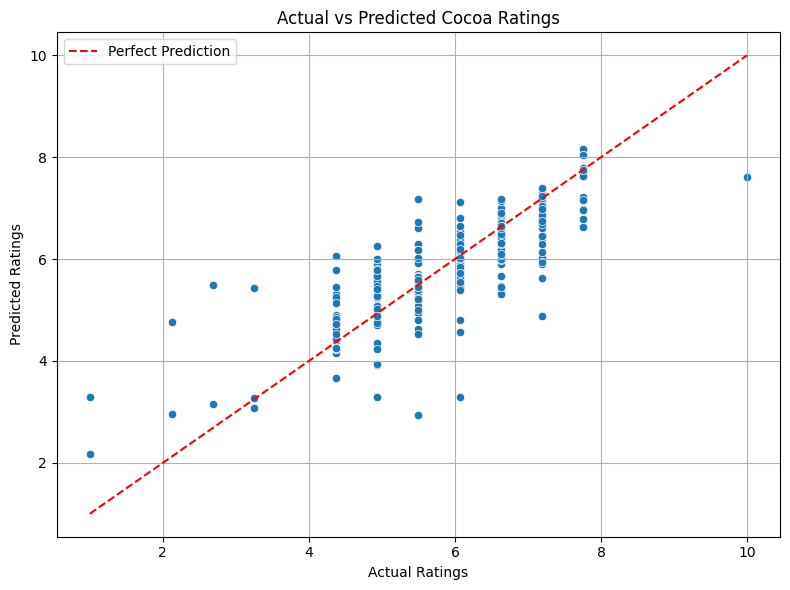

In [ ]:
# Step 0: Install required library
!pip install category_encoders

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Step 2: Load and clean the dataset
df = pd.read_csv("/content/cocoa_no_company_location.csv")
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float)

# Step 3: Apply target encoding to high-cardinality categorical columns
categorical_cols = ['Company', 'Bean Origin']
target_encoder = TargetEncoder(cols=categorical_cols)
df[categorical_cols] = target_encoder.fit_transform(df[categorical_cols], df['Rating (Out of 10)'])

# Step 4: Prepare features and target variable
X = df.drop(columns=['Id', 'Rating (Out of 10)'])
y = df['Rating (Out of 10)']

# Step 5: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
model = HistGradientBoostingRegressor(
    max_iter=300,
    max_depth=10,
    learning_rate=0.05,
    random_state=42
)
model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
y_pred_mean = np.mean(y_pred)
y_true_mean = np.mean(y_test)

print("R² Score:", round(r2, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Mean Predicted Rating:", round(y_pred_mean, 4))
print("Mean True Rating:", round(y_true_mean, 4))

# Step 8: Visualize predictions vs actual ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Cocoa Ratings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

!pip install category_encoders xgboost


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Load and clean the cocoa dataset
df = pd.read_csv("/content/cocoa_no_company_location.csv")
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float)

# Target encode 'Company' and 'Bean Origin'
encoder = TargetEncoder(cols=['Company', 'Bean Origin'])
df[['Company', 'Bean Origin']] = encoder.fit_transform(df[['Company', 'Bean Origin']], df['Rating (Out of 10)'])

# Feature matrix and target
X = df.drop(columns=['Id', 'Rating (Out of 10)'])
y = df['Rating (Out of 10)']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
xgb = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)

# Define meta-model
meta_model = LinearRegression()

# Create stacking ensemble
stacked_model = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('rf', rf),
        ('gbr', gbr)
    ],
    final_estimator=meta_model,
    n_jobs=-1
)

# Train the stacked model
stacked_model.fit(X_train, y_train)

# Make predictions
y_pred = stacked_model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
y_pred_mean = np.mean(y_pred)
y_true_mean = np.mean(y_test)

# Print results
print("Stacked R² Score:", round(r2, 4))
print("Stacked MAE:", round(mae, 4))
print("Mean Predicted Rating:", round(y_pred_mean, 4))
print("Mean True Rating:", round(y_true_mean, 4))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.1 MB/s eta 0:00:00
Stacked R² Score: 0.6948
Stacked MAE: 0.3686
Mean Predicted Rating: 5.9001
Mean True Rating: 5.9387


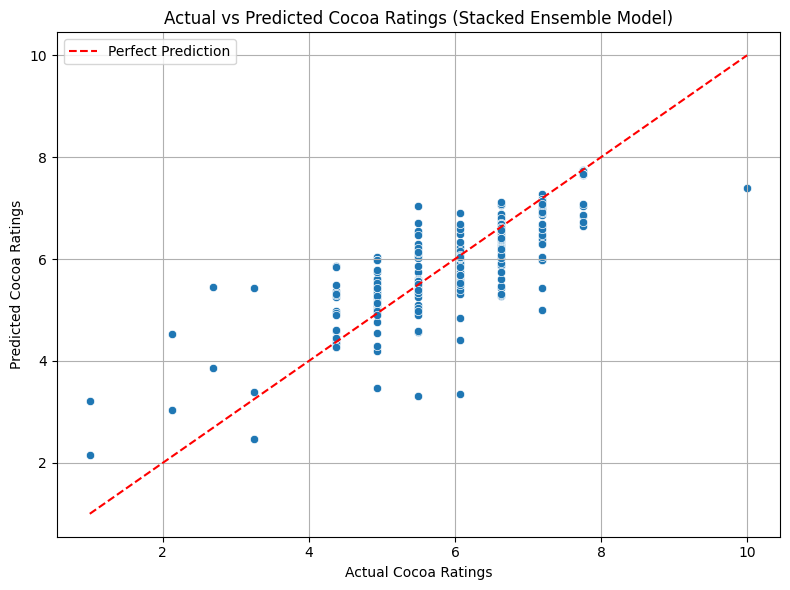

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)

# Draw a red dashed line where prediction = actual
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

plt.xlabel("Actual Cocoa Ratings")
plt.ylabel("Predicted Cocoa Ratings")
plt.title("Actual vs Predicted Cocoa Ratings (Stacked Ensemble Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

!pip install tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from category_encoders import TargetEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load and clean dataset
df = pd.read_csv("/content/cocoa_no_company_location.csv")
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float)

# Target Encoding
encoder = TargetEncoder(cols=['Company', 'Bean Origin'])
df[['Company', 'Bean Origin']] = encoder.fit_transform(df[['Company', 'Bean Origin']], df['Rating (Out of 10)'])

# Features and target
X = df.drop(columns=['Id', 'Rating (Out of 10)'])
y = df['Rating (Out of 10)']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Deep Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=0)

# Predict and evaluate
y_pred_nn = model.predict(X_test).flatten()
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

# Print results
print("Neural Network R² Score:", round(r2_nn, 4))
print("Neural Network MAE:", round(mae_nn, 4))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Neural Network R² Score: -0.9968
Neural Network MAE: 1.2963


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping

# Normalize features for neural network
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split again with scaled data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a smaller DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile and add early stopping
model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=10, restore_best_weights=True)

# Train with validation and early stopping
history = model.fit(X_train, y_train, epochs=150, batch_size=32,
                    validation_split=0.1, callbacks=[early_stop], verbose=0)

# Predict and evaluate
y_pred_nn = model.predict(X_test).flatten()
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print("Improved NN R² Score:", round(r2_nn, 4))
print("Improved NN MAE:", round(mae_nn, 4))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Improved NN R² Score: 0.6355
Improved NN MAE: 0.4936


In [ ]:

 !pip install torch torchvision
 !pip install category_encoders


import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv("/content/cocoa_no_company_location.csv")
df['Cocoa Percent'] = df['Cocoa Percent'].str.replace('%', '').astype(float)

# Target encode categorical columns
from category_encoders import TargetEncoder
encoder = TargetEncoder(cols=['Company', 'Bean Origin'])
df[['Company', 'Bean Origin']] = encoder.fit_transform(df[['Company', 'Bean Origin']], df['Rating (Out of 10)'])

# Features and target
X = df.drop(columns=['Id', 'Rating (Out of 10)'])
y = df['Rating (Out of 10)']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define Generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )
    def forward(self, z):
        return self.model(z)

# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.model(x)

# Setup dimensions
z_dim = 32  # size of random noise vector
feature_dim = X_scaled.shape[1]

# Initialize models
G = Generator(z_dim, feature_dim).to(device)
D = Discriminator(feature_dim).to(device)

# Loss and optimizers
criterion = nn.BCELoss()
g_optimizer = optim.Adam(G.parameters(), lr=0.0002)
d_optimizer = optim.Adam(D.parameters(), lr=0.0002)

# Training loop
epochs = 5000
for epoch in range(epochs):
    # Train Discriminator
    real_samples = X_scaled.to(device)
    real_labels = torch.ones(real_samples.size(0), 1).to(device)

    noise = torch.randn(real_samples.size(0), z_dim).to(device)
    fake_samples = G(noise)
    fake_labels = torch.zeros(real_samples.size(0), 1).to(device)

    outputs_real = D(real_samples)
    outputs_fake = D(fake_samples.detach())

    d_loss_real = criterion(outputs_real, real_labels)
    d_loss_fake = criterion(outputs_fake, fake_labels)
    d_loss = d_loss_real + d_loss_fake

    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()

    # Train Generator
    noise = torch.randn(real_samples.size(0), z_dim).to(device)
    fake_samples = G(noise)
    outputs = D(fake_samples)

    g_loss = criterion(outputs, real_labels)

    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()

    # Print some logs
    if (epoch+1) % 500 == 0:
        print(f"Epoch [{epoch+1}/{epochs}]  D_loss: {d_loss.item():.4f}  G_loss: {g_loss.item():.4f}")

# Generate synthetic cocoa features
num_synthetic_samples = 1000
noise = torch.randn(num_synthetic_samples, z_dim).to(device)
synthetic_features = G(noise).detach().cpu().numpy()

# Inverse transform
synthetic_features = np.clip(synthetic_features, 0, 1)

# Combine real and synthetic
X_combined = np.vstack((X_scaled.cpu().numpy(), synthetic_features))
y_combined = np.vstack((y.cpu().numpy(), np.random.uniform(low=5.5, high=8.0, size=(num_synthetic_samples, 1))))  # Assume reasonable ratings for synthetic

print("Real + Synthetic dataset shape:", X_combined.shape, y_combined.shape)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.0 MB/s eta 0:00:00
Epoch [500/5000]  D_loss: 1.3840  G_loss: 0.6911
Epoch [1000/5000]  D_loss: 1.3901  G_loss: 0.6929
Epoch [1500/5000]  D_loss: 1.3890  G_loss: 0.6937
Epoch [2000/5000]  D_loss: 1.4010  G_loss: 0.7191
Epoch [2500/5000]  D_loss: 1.3907  G_loss: 0.7010
Epoch [3000/5000]  D_loss: 1.3859  G_loss: 0.6968
Epoch [3500/5000]  D_loss: 1.3761  G_loss: 0.6147
Epoch [4000/5000]  D_loss: 1.4148  G_loss: 0.6383
Epoch [4500/5000]  D_loss: 1.3985  G_loss: 0.7257
Epoch [5000/5000]  D_loss: 1.3844  G_loss: 0.7161
Real + Synthetic dataset shape: (2791, 4) (2791, 1)


In [ ]:

 !pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Split the combined data (real + synthetic)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Build a new DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=0)

# Predict and evaluate
y_pred_nn = model.predict(X_test).flatten()
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print("Neural Network with Synthetic Data R² Score:", round(r2_nn, 4))
print("Neural Network with Synthetic Data MAE:", round(mae_nn, 4))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Network with Synthetic Data R² Score: 0.5901
Neural Network with Synthetic Data MAE: 0.5571


In [ ]:
!pip install ctgan


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.1 MB/s eta 0:00:00


In [ ]:
# Step 1: Reload all datasets
import pandas as pd

cocoa_data = pd.read_csv("/content/cocoa_no_company_location.csv")
climate_data = pd.read_csv("/content/Climate_data (1)(in).csv")
yield_data = pd.read_csv("/content/UNdata_Cleaned_Yield-2.csv")

# Step 2: Clean cocoa dataset
cocoa_data['Cocoa Percent'] = cocoa_data['Cocoa Percent'].str.replace('%', '').astype(float)
cocoa_data['Bean Origin'] = cocoa_data['Bean Origin'].str.lower().str.strip()
climate_data['Country of Origin'] = climate_data['Country of Origin'].str.lower().str.strip()
yield_data['Country'] = yield_data['Country'].str.lower().str.strip()

cocoa_data['Review Date'] = cocoa_data['Review Date'].astype(int)
climate_data['Harvest Year'] = climate_data['Harvest Year'].astype(int)
yield_data['Year'] = yield_data['Year'].astype(int)

# Step 3: Merge cocoa + climate
cocoa_with_climate = pd.merge(
    cocoa_data,
    climate_data,
    left_on=['Bean Origin', 'Review Date'],
    right_on=['Country of Origin', 'Harvest Year'],
    how='left'
)

# Step 4: Merge with yield
cocoa_with_climate_yield = pd.merge(
    cocoa_with_climate,
    yield_data,
    left_on=['Bean Origin', 'Review Date'],
    right_on=['Country', 'Year'],
    how='left'
)

# Step 5: Clean up merged file
cocoa_with_climate_yield.drop(columns=['Country of Origin', 'Harvest Year', 'Country', 'Year'], inplace=True)

# Step 6: Fill missing values with mean
final_data = cocoa_with_climate_yield.copy()
columns_to_fill = ['Annual precipitation', 'Temperature Change on Land', 'Yield (kg/ha)', 'Yield (t/ha)']
for col in columns_to_fill:
    final_data[col].fillna(final_data[col].mean(), inplace=True)

print(" final_data is now rebuilt and ready!")


✅ final_data is now rebuilt and ready!


<ipython-input-3-73a43b9737a7>:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_data[col].fillna(final_data[col].mean(), inplace=True)


In [ ]:
# Save the final enriched cocoa dataset
final_data.to_csv("/content/cocoa_enriched_with_climate_yield.csv", index=False)

print(" Merged file saved as: cocoa_enriched_with_climate_yield.csv")


 Merged file saved as: cocoa_enriched_with_climate_yield.csv


In [ ]:
from google.colab import files
files.download("/content/cocoa_enriched_with_climate_yield.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install ctgan
!pip install category_encoders

from ctgan import CTGAN
from category_encoders import TargetEncoder
import pandas as pd
import numpy as np

# Load enriched cocoa data
final_data = pd.read_csv("cocoa_enriched_with_climate_yield.csv")

# Apply Target Encoding to categorical columns
encoder = TargetEncoder(cols=['Company', 'Bean Origin'])
final_data[['Company', 'Bean Origin']] = encoder.fit_transform(
    final_data[['Company', 'Bean Origin']], final_data['Rating (Out of 10)']
)

# Drop ID if exists
data_for_ctgan = final_data.drop(columns=['Id']) if 'Id' in final_data.columns else final_data.copy()

# Now fit CTGAN
ctgan = CTGAN(epochs=300)
ctgan.fit(data_for_ctgan, discrete_columns=[])  # No more strings, so this can stay empty

# Generate synthetic samples
synthetic_data = ctgan.sample(1000)

# Save it
synthetic_data.to_csv("synthetic_cocoa_ctgan.csv", index=False)
print(" Synthetic data saved as: synthetic_cocoa_ctgan.csv")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00
✅ Synthetic data saved as: synthetic_cocoa_ctgan.csv


In [ ]:
from category_encoders import TargetEncoder

# Reload final merged data
final_data = pd.read_csv("cocoa_enriched_with_climate_yield.csv")

# Apply Target Encoding to 'Company' and 'Bean Origin'
encoder = TargetEncoder(cols=['Company', 'Bean Origin'])
final_data[['Company', 'Bean Origin']] = encoder.fit_transform(final_data[['Company', 'Bean Origin']], final_data['Rating (Out of 10)'])

# Now ready for CTGAN
data_for_ctgan = final_data.drop(columns=['Id']) if 'Id' in final_data.columns else final_data.copy()

# Train CTGAN
from ctgan import CTGAN

ctgan = CTGAN(epochs=300)
ctgan.fit(data_for_ctgan, discrete_columns=[])

# Generate synthetic samples
num_synthetic_samples = 1000
synthetic_data = ctgan.sample(num_synthetic_samples)

# Prepare real and synthetic data
X_synthetic = synthetic_data.drop(columns=['Rating (Out of 10)']).values
y_synthetic = synthetic_data['Rating (Out of 10)'].values.reshape(-1, 1)

X_real = data_for_ctgan.drop(columns=['Rating (Out of 10)']).values
y_real = data_for_ctgan['Rating (Out of 10)'].values.reshape(-1, 1)

X_combined = np.vstack((X_real, X_synthetic))
y_combined = np.vstack((y_real, y_synthetic))

print(" Real + Synthetic enriched dataset ready! Shape:", X_combined.shape, y_combined.shape)


 Real + Synthetic enriched dataset ready! Shape: (3542, 8) (3542, 1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Build the DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=0)

# Evaluate the model
y_pred_nn = model.predict(X_test).flatten()
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

print("Final DNN R² Score:", round(r2_nn, 4))
print("Final DNN MAE:", round(mae_nn, 4))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Final DNN R² Score: -22.3552
Final DNN MAE: 1.1585


In [ ]:
# Save CTGAN synthetic data to CSV
synthetic_data.to_csv("synthetic_cocoa_ctgan.csv", index=False)

print(" CTGAN synthetic data saved as: synthetic_cocoa_ctgan.csv")


✅ CTGAN synthetic data saved as: synthetic_cocoa_ctgan.csv


In [ ]:
from google.colab import files
files.download("synthetic_cocoa_ctgan.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the synthetic dataset
df = pd.read_csv("synthetic_cocoa_ctgan.csv")

# Split features and target
X = df.drop(columns=['Rating (Out of 10)']).values
y = df['Rating (Out of 10)'].values.reshape(-1, 1)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM/GRU input: [samples, time steps, features]
X_scaled_3d = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.metrics import r2_score, mean_absolute_error

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_3d, y, test_size=0.2, random_state=42)

#  LSTM Model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

y_pred_lstm = lstm_model.predict(X_test).flatten()
print(" LSTM R²:", round(r2_score(y_test, y_pred_lstm), 4))
print("LSTM MAE:", round(mean_absolute_error(y_test, y_pred_lstm), 4))


#  GRU Model
gru_model = Sequential([
    GRU(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

y_pred_gru = gru_model.predict(X_test).flatten()
print(" GRU R²:", round(r2_score(y_test, y_pred_gru), 4))
print("GRU MAE:", round(mean_absolute_error(y_test, y_pred_gru), 4))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
 LSTM R²: -0.0046
LSTM MAE: 0.7637


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
 GRU R²: -0.0076
GRU MAE: 0.7646


In [ ]:
!pip install pytorch-tabnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install pytorch-tabnet

from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# Load synthetic data
df = pd.read_csv("synthetic_cocoa_ctgan.csv")
X = df.drop(columns=['Rating (Out of 10)']).values
y = df['Rating (Out of 10)'].values

# Train-test split
X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape target for TabNet
y_train = y_train_raw.reshape(-1, 1)
y_test = y_test_raw.reshape(-1, 1)

# Train TabNet
tabnet = TabNetRegressor(verbose=0)
tabnet.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric=['rmse'])

# Predict and evaluate
y_pred = tabnet.predict(X_test).flatten()
print("TabNet R²:", round(r2_score(y_test_raw, y_pred), 4))
print("TabNet MAE:", round(mean_absolute_error(y_test_raw, y_pred), 4))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
!pip install sdv


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision


In [ ]:
!pip install torch torchvision category_encoders


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder

# Load data
df = pd.read_csv("cocoa_enriched_with_climate_yield.csv")
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

# Encode categorical columns
encoder = TargetEncoder(cols=['Company', 'Bean Origin'])
df[['Company', 'Bean Origin']] = encoder.fit_transform(df[['Company', 'Bean Origin']], df['Rating (Out of 10)'])

# Select features and target
target_col = 'Rating (Out of 10)'
condition_cols = ['Cocoa Percent']

features = df.drop(columns=[target_col]).values
labels = df[target_col].values
conditions = df[condition_cols].values

# Normalize
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(labels.reshape(-1, 1))

scaler_c = MinMaxScaler()
c_scaled = scaler_c.fit_transform(conditions)

# Tensor prep
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)
c_tensor = torch.tensor(c_scaled, dtype=torch.float32)

dataset = TensorDataset(c_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Generator
class Generator(nn.Module):
    def __init__(self, condition_dim, output_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(10 + condition_dim, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )
    def forward(self, z, c):
        return self.model(torch.cat([z, c], dim=1))

# Discriminator
class Discriminator(nn.Module):
    def __init__(self, condition_dim, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim + condition_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    def forward(self, x, c):
        return self.model(torch.cat([x, c], dim=1))

# Instantiate models
condition_dim = c_tensor.shape[1]
data_dim = y_tensor.shape[1]
G = Generator(condition_dim, data_dim)
D = Discriminator(condition_dim, data_dim)

criterion = nn.BCELoss()
optimizer_G = torch.optim.Adam(G.parameters(), lr=0.001)
optimizer_D = torch.optim.Adam(D.parameters(), lr=0.001)

# Train the GAN
epochs = 500
for epoch in range(epochs):
    for c_batch, y_batch in loader:
        batch_size = c_batch.size(0)
        real = torch.ones(batch_size, 1)
        fake = torch.zeros(batch_size, 1)

        # Train Discriminator
        optimizer_D.zero_grad()
        z = torch.randn(batch_size, 10)
        fake_data = G(z, c_batch).detach()
        d_loss = criterion(D(y_batch, c_batch), real) + criterion(D(fake_data, c_batch), fake)
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, 10)
        g_loss = criterion(D(G(z, c_batch), c_batch), real)
        g_loss.backward()
        optimizer_G.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs} - D_loss: {d_loss.item():.4f} - G_loss: {g_loss.item():.4f}")

# Generate new data
with torch.no_grad():
    z = torch.randn(1000, 10)
    c_sample = torch.tensor(scaler_c.transform(df[condition_cols].sample(1000, replace=True).values), dtype=torch.float32)
    synthetic_labels = G(z, c_sample).numpy()

synthetic_ratings = scaler_y.inverse_transform(synthetic_labels)
synthetic_cgan = pd.DataFrame(c_sample.numpy(), columns=condition_cols)
synthetic_cgan[target_col] = synthetic_ratings

synthetic_cgan.to_csv("synthetic_cocoa_cgan.csv", index=False)
print(" Conditional GAN data saved as: synthetic_cocoa_cgan.csv")


Epoch 100/500 - D_loss: 1.3902 - G_loss: 0.6634
Epoch 200/500 - D_loss: 1.3777 - G_loss: 0.6877
Epoch 300/500 - D_loss: 1.3810 - G_loss: 0.7256
Epoch 400/500 - D_loss: 1.3961 - G_loss: 0.6744
Epoch 500/500 - D_loss: 1.3798 - G_loss: 0.7042
 Conditional GAN data saved as: synthetic_cocoa_cgan.csv


In [ ]:
from google.colab import files
files.download("synthetic_cocoa_cgan.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install pytorch-tabnet


In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from pytorch_tabnet.tab_model import TabNetRegressor

# Load data
df = pd.read_csv("synthetic_cocoa_cgan.csv")

# Features and target
X = df.drop(columns=['Rating (Out of 10)']).values
y = df['Rating (Out of 10)'].values.reshape(-1, 1)

# Scale target
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Define TabNet model
tabnet = TabNetRegressor(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=0.01),
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    scheduler_params={"step_size":10, "gamma":0.9},
    verbose=1
)

# Train with early stopping using 'patience' in fit()
tabnet.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_name=["val"],
    eval_metric=["rmse"],
    max_epochs=300,
    patience=20,
    batch_size=128,
    virtual_batch_size=64,
    drop_last=False
)

# Predict and inverse scale
y_pred = tabnet.predict(X_test)
y_pred_actual = scaler_y.inverse_transform(y_pred)
y_test_actual = scaler_y.inverse_transform(y_test)

# Evaluation
print("TabNet R²:", round(r2_score(y_test_actual, y_pred_actual), 4))
print("TabNet MAE:", round(mean_absolute_error(y_test_actual, y_pred_actual), 4))


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.3883  | val_rmse: 0.26899 |  0:00:00s
epoch 1  | loss: 0.13982 | val_rmse: 0.40752 |  0:00:01s
epoch 2  | loss: 0.07105 | val_rmse: 0.25721 |  0:00:01s
epoch 3  | loss: 0.04438 | val_rmse: 0.37667 |  0:00:02s
epoch 4  | loss: 0.03657 | val_rmse: 0.30779 |  0:00:03s
epoch 5  | loss: 0.02211 | val_rmse: 0.28158 |  0:00:04s
epoch 6  | loss: 0.01391 | val_rmse: 0.15508 |  0:00:05s
epoch 7  | loss: 0.01676 | val_rmse: 0.1818  |  0:00:06s
epoch 8  | loss: 0.01141 | val_rmse: 0.14795 |  0:00:07s
epoch 9  | loss: 0.01609 | val_rmse: 0.12666 |  0:00:07s
epoch 10 | loss: 0.01524 | val_rmse: 0.09719 |  0:00:08s
epoch 11 | loss: 0.0141  | val_rmse: 0.09225 |  0:00:09s
epoch 12 | loss: 0.0152  | val_rmse: 0.0867  |  0:00:09s
epoch 13 | loss: 0.0107  | val_rmse: 0.11048 |  0:00:10s
epoch 14 | loss: 0.00998 | val_rmse: 0.09165 |  0:00:10s
epoch 15 | loss: 0.0105  | val_rmse: 0.0913  |  0:00:11s
epoch 16 | loss: 0.00962 | val_rmse: 0.09211 |  0:00:11s
epoch 17 | loss: 0.00988 | val_

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
!pip install torch torchvision


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv("synthetic_cocoa_cgan.csv")
X = df.drop(columns=['Rating (Out of 10)']).values
y = df['Rating (Out of 10)'].values.reshape(-1, 1)

# Normalize
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Combine for VAE (features + target)
X_full = np.hstack((X_scaled, y_scaled))

# Split
X_train, X_test = train_test_split(X_full, test_size=0.2, random_state=42)

# Convert to tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)

train_loader = torch.utils.data.DataLoader(X_train_t, batch_size=64, shuffle=True)

# VAE architecture
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim=8):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU()
        )
        self.mu = nn.Linear(32, latent_dim)
        self.log_var = nn.Linear(32, latent_dim)

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        enc = self.encoder(x)
        mu = self.mu(enc)
        log_var = self.log_var(enc)
        z = self.reparameterize(mu, log_var)
        recon = self.decoder(z)
        return recon, mu, log_var, z

# Setup
input_dim = X_full.shape[1]
vae = VAE(input_dim=input_dim)
optimizer = torch.optim.Adam(vae.parameters(), lr=0.001)

# Loss function
def vae_loss(x, recon, mu, log_var):
    recon_loss = nn.functional.mse_loss(recon, x, reduction='mean')
    kl_div = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp()) / x.size(0)
    return recon_loss + kl_div

# Train VAE
vae.train()
for epoch in range(100):
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        recon, mu, log_var, _ = vae(batch)
        loss = vae_loss(batch, recon, mu, log_var)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

# Evaluation (extract latent + train linear regressor)
vae.eval()
with torch.no_grad():
    _, _, _, z_train = vae(X_train_t)
    _, _, _, z_test = vae(X_test_t)

# Use latent to predict the last column (rating)
y_train_true = X_train[:, -1]
y_test_true = X_test[:, -1]

regressor = nn.Linear(z_train.shape[1], 1)
loss_fn = nn.MSELoss()
optimizer_r = torch.optim.Adam(regressor.parameters(), lr=0.01)

# Train simple regressor
for epoch in range(100):
    regressor.train()
    pred = regressor(z_train)
    loss = loss_fn(pred.squeeze(), torch.tensor(y_train_true, dtype=torch.float32))
    optimizer_r.zero_grad()
    loss.backward()
    optimizer_r.step()

# Evaluate
regressor.eval()
y_pred = regressor(z_test).detach().numpy()
y_pred_actual = scaler_y.inverse_transform(y_pred)
y_test_actual = scaler_y.inverse_transform(y_test_true.reshape(-1, 1))

print("VAE Regressor R²:", round(r2_score(y_test_actual, y_pred_actual), 4))
print("VAE Regressor MAE:", round(mean_absolute_error(y_test_actual, y_pred_actual), 4))


Epoch 20, Loss: 0.1766
Epoch 40, Loss: 0.1582
Epoch 60, Loss: 0.1570
Epoch 80, Loss: 0.1550
Epoch 100, Loss: 0.1540
VAE Regressor R²: -0.0469
VAE Regressor MAE: 0.1918


In [ ]:
!pip install pytorch-tabnet


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.06627 | val_mae: 0.32508 |  0:00:00s
epoch 1  | loss: 0.09829 | val_mae: 0.07092 |  0:00:01s
epoch 2  | loss: 0.03521 | val_mae: 0.14352 |  0:00:01s
epoch 3  | loss: 0.01897 | val_mae: 0.06968 |  0:00:02s
epoch 4  | loss: 0.01617 | val_mae: 0.14042 |  0:00:03s
epoch 5  | loss: 0.01657 | val_mae: 0.09082 |  0:00:05s
epoch 6  | loss: 0.01534 | val_mae: 0.06486 |  0:00:05s
epoch 7  | loss: 0.01608 | val_mae: 0.09211 |  0:00:06s
epoch 8  | loss: 0.00942 | val_mae: 0.09729 |  0:00:07s
epoch 9  | loss: 0.01483 | val_mae: 0.07019 |  0:00:07s
epoch 10 | loss: 0.01128 | val_mae: 0.06464 |  0:00:08s
epoch 11 | loss: 0.01108 | val_mae: 0.08047 |  0:00:09s
epoch 12 | loss: 0.01187 | val_mae: 0.06611 |  0:00:09s
epoch 13 | loss: 0.00836 | val_mae: 0.06667 |  0:00:10s
epoch 14 | loss: 0.00946 | val_mae: 0.09957 |  0:00:10s
epoch 15 | loss: 0.00822 | val_mae: 0.06252 |  0:00:11s
epoch 16 | loss: 0.00812 | val_mae: 0.07212 |  0:00:11s
epoch 17 | loss: 0.00711 | val_mae: 0.07106 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


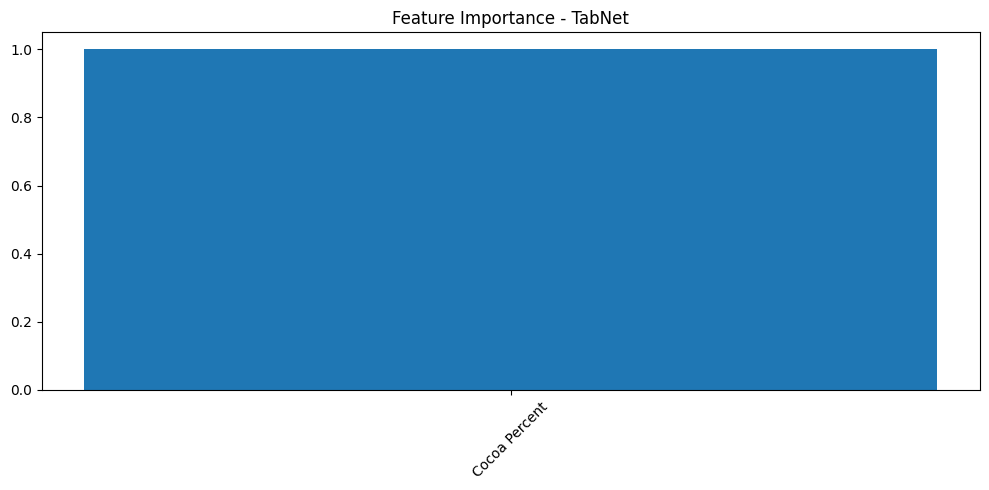

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error
from pytorch_tabnet.tab_model import TabNetRegressor

# Load synthetic data
df = pd.read_csv("synthetic_cocoa_cgan.csv")
X = df.drop(columns=["Rating (Out of 10)"]).values
y = df["Rating (Out of 10)"].values.reshape(-1, 1)

# Normalize target
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Advanced TabNet model
tabnet = TabNetRegressor(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.85},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',  # better feature selection
    verbose=1
)

# Train model
tabnet.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_name=["val"],
    eval_metric=["mae"],
    max_epochs=300,
    patience=25,
    batch_size=128,
    virtual_batch_size=64,
    drop_last=False
)

# Predict
y_pred_scaled = tabnet.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test)

# Evaluation
print("Advanced TabNet R²:", round(r2_score(y_test_actual, y_pred), 4))
print("Advanced TabNet MAE:", round(mean_absolute_error(y_test_actual, y_pred), 4))

# Feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(df.drop(columns=["Rating (Out of 10)"]).columns, tabnet.feature_importances_)
plt.title("Feature Importance - TabNet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Load data
df = pd.read_csv("synthetic_cocoa_cgan.csv")
X = df.drop(columns=["Rating (Out of 10)"]).values
y = df["Rating (Out of 10)"].values.reshape(-1, 1)

# Normalize
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Reshape input to (samples, time_steps, features) → here: (N, 1, features)
X_seq = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_scaled, test_size=0.2, random_state=42)

# Convert to tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

# LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.lstm = nn.LSTM(input_size=input_dim, hidden_size=32, batch_first=True)
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        _, (h, _) = self.lstm(x)
        return self.fc(h[-1])

# GRU model
class GRUModel(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.gru = nn.GRU(input_size=input_dim, hidden_size=32, batch_first=True)
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        _, h = self.gru(x)
        return self.fc(h[-1])

# Train function
def train_model(model, X, y, X_val, y_val, name):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.MSELoss()
    for epoch in range(100):
        model.train()
        optimizer.zero_grad()
        pred = model(X)
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        if (epoch + 1) % 20 == 0:
            print(f"{name} Epoch {epoch+1}, Loss: {loss.item():.4f}")
    return model

# Train and evaluate LSTM
lstm_model = LSTMModel(input_dim=X_train.shape[2])
lstm_model = train_model(lstm_model, X_train_t, y_train_t, X_test_t, y_test_t, "LSTM")
lstm_model.eval()
lstm_pred = lstm_model(X_test_t).detach().numpy()
lstm_pred_actual = scaler_y.inverse_transform(lstm_pred)
y_test_actual = scaler_y.inverse_transform(y_test)

# Train and evaluate GRU
gru_model = GRUModel(input_dim=X_train.shape[2])
gru_model = train_model(gru_model, X_train_t, y_train_t, X_test_t, y_test_t, "GRU")
gru_model.eval()
gru_pred = gru_model(X_test_t).detach().numpy()
gru_pred_actual = scaler_y.inverse_transform(gru_pred)

# Results
print("\n LSTM R²:", round(r2_score(y_test_actual, lstm_pred_actual), 4))
print(" LSTM MAE:", round(mean_absolute_error(y_test_actual, lstm_pred_actual), 4))

print("\n GRU R²:", round(r2_score(y_test_actual, gru_pred_actual), 4))
print(" GRU MAE:", round(mean_absolute_error(y_test_actual, gru_pred_actual), 4))


LSTM Epoch 20, Loss: 0.2693
LSTM Epoch 40, Loss: 0.1775
LSTM Epoch 60, Loss: 0.0954
LSTM Epoch 80, Loss: 0.0389
LSTM Epoch 100, Loss: 0.0160
GRU Epoch 20, Loss: 0.3897
GRU Epoch 40, Loss: 0.2572
GRU Epoch 60, Loss: 0.1398
GRU Epoch 80, Loss: 0.0568
GRU Epoch 100, Loss: 0.0204

 LSTM R²: -0.5806
 LSTM MAE: 0.2518

 GRU R²: -1.1305
 GRU MAE: 0.3055


In [ ]:
!pip install optuna pytorch-tabnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 13.4 MB/s eta 0:00:00


In [ ]:

def objective(trial):
    params = {
        "n_d": trial.suggest_int("n_d", 8, 64),
        "n_a": trial.suggest_int("n_a", 8, 64),
        "n_steps": trial.suggest_int("n_steps", 3, 10),
        "gamma": trial.suggest_float("gamma", 1.0, 2.0),
        "lambda_sparse": trial.suggest_float("lambda_sparse", 1e-6, 1e-2),
        "optimizer_fn": torch.optim.Adam,
        "optimizer_params": {"lr": trial.suggest_float("lr", 1e-3, 1e-1)},
        "mask_type": "entmax",
        "scheduler_fn": torch.optim.lr_scheduler.StepLR,
        "scheduler_params": {"step_size": 10, "gamma": 0.9}
    }

    model = TabNetRegressor(**params)

    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_name=["val"],
        eval_metric=["mae"],
        max_epochs=200,
        patience=20,
        batch_size=128,
        virtual_batch_size=64,
        drop_last=False

    )

    y_pred = model.predict(X_test)
    score = r2_score(scaler_y.inverse_transform(y_test), scaler_y.inverse_transform(y_pred))
    return score


In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)


[I 2025-05-03 01:08:49,667] A new study created in memory with name: no-name-1f49fb59-29eb-4505-ad19-e2e90cfefd60
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.80273 | val_mae: 2.2254  |  0:00:00s
epoch 1  | loss: 0.2838  | val_mae: 0.44578 |  0:00:01s
epoch 2  | loss: 0.0396  | val_mae: 0.35334 |  0:00:02s
epoch 3  | loss: 0.02677 | val_mae: 0.23763 |  0:00:03s
epoch 4  | loss: 0.02121 | val_mae: 0.10796 |  0:00:03s
epoch 5  | loss: 0.01219 | val_mae: 0.07342 |  0:00:04s
epoch 6  | loss: 0.01299 | val_mae: 0.08169 |  0:00:05s
epoch 7  | loss: 0.00884 | val_mae: 0.06494 |  0:00:06s
epoch 8  | loss: 0.00919 | val_mae: 0.06459 |  0:00:07s
epoch 9  | loss: 0.00895 | val_mae: 0.06505 |  0:00:08s
epoch 10 | loss: 0.00886 | val_mae: 0.06409 |  0:00:10s
epoch 11 | loss: 0.00914 | val_mae: 0.08902 |  0:00:11s
epoch 12 | loss: 0.00841 | val_mae: 0.06427 |  0:00:11s
epoch 13 | loss: 0.00715 | val_mae: 0.07665 |  0:00:12s
epoch 14 | loss: 0.00734 | val_mae: 0.06548 |  0:00:13s
epoch 15 | loss: 0.00833 | val_mae: 0.06279 |  0:00:14s
epoch 16 | loss: 0.00857 | val_mae: 0.07865 |  0:00:15s
epoch 17 | loss: 0.00791 | val_mae: 0.0702  |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:09:49,268] Trial 0 finished with value: 0.24746663744765773 and parameters: {'n_d': 8, 'n_a': 22, 'n_steps': 6, 'gamma': 1.0344302320023218, 'lambda_sparse': 0.004615415453199433, 'lr': 0.060135313066427165}. Best is trial 0 with value: 0.24746663744765773.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 43.8516 | val_mae: 4.34879 |  0:00:00s
epoch 1  | loss: 1.09799 | val_mae: 0.64187 |  0:00:01s
epoch 2  | loss: 0.19324 | val_mae: 0.10302 |  0:00:02s
epoch 3  | loss: 0.18387 | val_mae: 0.2102  |  0:00:02s
epoch 4  | loss: 0.26126 | val_mae: 0.11965 |  0:00:03s
epoch 5  | loss: 0.04178 | val_mae: 0.11861 |  0:00:04s
epoch 6  | loss: 0.02485 | val_mae: 0.07098 |  0:00:05s
epoch 7  | loss: 0.03669 | val_mae: 0.06601 |  0:00:05s
epoch 8  | loss: 0.02684 | val_mae: 0.06735 |  0:00:06s
epoch 9  | loss: 0.03154 | val_mae: 0.09057 |  0:00:07s
epoch 10 | loss: 0.02328 | val_mae: 0.06686 |  0:00:07s
epoch 11 | loss: 0.01706 | val_mae: 0.06317 |  0:00:08s
epoch 12 | loss: 0.00996 | val_mae: 0.08093 |  0:00:08s
epoch 13 | loss: 0.00802 | val_mae: 0.06375 |  0:00:09s
epoch 14 | loss: 0.01884 | val_mae: 0.06552 |  0:00:09s
epoch 15 | loss: 0.01224 | val_mae: 0.06557 |  0:00:10s
epoch 16 | loss: 0.01004 | val_mae: 0.06374 |  0:00:11s
epoch 17 | loss: 0.01159 | val_mae: 0.06391 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:10:42,431] Trial 1 finished with value: 0.24418100545711185 and parameters: {'n_d': 38, 'n_a': 36, 'n_steps': 7, 'gamma': 1.5574080418532579, 'lambda_sparse': 0.0025686113941666314, 'lr': 0.060162466542588756}. Best is trial 0 with value: 0.24746663744765773.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 27.06489| val_mae: 6.82159 |  0:00:00s
epoch 1  | loss: 0.20496 | val_mae: 0.90345 |  0:00:00s
epoch 2  | loss: 0.05855 | val_mae: 0.54818 |  0:00:01s
epoch 3  | loss: 0.02929 | val_mae: 0.34215 |  0:00:01s
epoch 4  | loss: 0.01535 | val_mae: 0.21458 |  0:00:02s
epoch 5  | loss: 0.01365 | val_mae: 0.17962 |  0:00:02s
epoch 6  | loss: 0.01313 | val_mae: 0.10196 |  0:00:03s
epoch 7  | loss: 0.01081 | val_mae: 0.07714 |  0:00:04s
epoch 8  | loss: 0.00947 | val_mae: 0.09716 |  0:00:04s
epoch 9  | loss: 0.00852 | val_mae: 0.08933 |  0:00:05s
epoch 10 | loss: 0.00859 | val_mae: 0.06721 |  0:00:05s
epoch 11 | loss: 0.00699 | val_mae: 0.07131 |  0:00:06s
epoch 12 | loss: 0.0068  | val_mae: 0.07826 |  0:00:06s
epoch 13 | loss: 0.00773 | val_mae: 0.06791 |  0:00:07s
epoch 14 | loss: 0.00698 | val_mae: 0.07198 |  0:00:07s
epoch 15 | loss: 0.00674 | val_mae: 0.06422 |  0:00:08s
epoch 16 | loss: 0.00768 | val_mae: 0.0651  |  0:00:08s
epoch 17 | loss: 0.00694 | val_mae: 0.0742  |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:11:21,712] Trial 2 finished with value: 0.22978378085089446 and parameters: {'n_d': 25, 'n_a': 46, 'n_steps': 5, 'gamma': 1.0919084672816672, 'lambda_sparse': 0.007711784538991193, 'lr': 0.09736961649592538}. Best is trial 0 with value: 0.24746663744765773.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 15.12519| val_mae: 1.86398 |  0:00:00s
epoch 1  | loss: 0.5834  | val_mae: 0.47874 |  0:00:01s
epoch 2  | loss: 0.23762 | val_mae: 0.1513  |  0:00:02s
epoch 3  | loss: 0.13365 | val_mae: 0.4352  |  0:00:02s
epoch 4  | loss: 0.06339 | val_mae: 0.37751 |  0:00:03s
epoch 5  | loss: 0.0522  | val_mae: 0.13783 |  0:00:04s
epoch 6  | loss: 0.0296  | val_mae: 0.16204 |  0:00:05s
epoch 7  | loss: 0.02311 | val_mae: 0.10747 |  0:00:06s
epoch 8  | loss: 0.01768 | val_mae: 0.11237 |  0:00:07s
epoch 9  | loss: 0.01287 | val_mae: 0.08641 |  0:00:07s
epoch 10 | loss: 0.01136 | val_mae: 0.06687 |  0:00:08s
epoch 11 | loss: 0.02302 | val_mae: 0.06624 |  0:00:09s
epoch 12 | loss: 0.02429 | val_mae: 0.06456 |  0:00:09s
epoch 13 | loss: 0.02067 | val_mae: 0.06908 |  0:00:10s
epoch 14 | loss: 0.02903 | val_mae: 0.06755 |  0:00:11s
epoch 15 | loss: 0.02386 | val_mae: 0.06765 |  0:00:11s
epoch 16 | loss: 0.02708 | val_mae: 0.06548 |  0:00:12s
epoch 17 | loss: 0.01555 | val_mae: 0.0683  |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:12:41,593] Trial 3 finished with value: 0.2481848210594234 and parameters: {'n_d': 11, 'n_a': 64, 'n_steps': 8, 'gamma': 1.8178906594063555, 'lambda_sparse': 0.00672555364137809, 'lr': 0.022638369995268744}. Best is trial 3 with value: 0.2481848210594234.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 13.76583| val_mae: 2.4811  |  0:00:00s
epoch 1  | loss: 3.44517 | val_mae: 0.24558 |  0:00:01s
epoch 2  | loss: 0.22619 | val_mae: 0.57652 |  0:00:01s
epoch 3  | loss: 0.06601 | val_mae: 0.14831 |  0:00:02s
epoch 4  | loss: 0.02975 | val_mae: 0.07554 |  0:00:02s
epoch 5  | loss: 0.02355 | val_mae: 0.12352 |  0:00:03s
epoch 6  | loss: 0.01819 | val_mae: 0.08451 |  0:00:03s
epoch 7  | loss: 0.01203 | val_mae: 0.06752 |  0:00:03s
epoch 8  | loss: 0.00921 | val_mae: 0.07712 |  0:00:04s
epoch 9  | loss: 0.00945 | val_mae: 0.08808 |  0:00:05s
epoch 10 | loss: 0.00867 | val_mae: 0.06834 |  0:00:05s
epoch 11 | loss: 0.00772 | val_mae: 0.06379 |  0:00:06s
epoch 12 | loss: 0.0071  | val_mae: 0.07108 |  0:00:07s
epoch 13 | loss: 0.00769 | val_mae: 0.07756 |  0:00:08s
epoch 14 | loss: 0.01097 | val_mae: 0.067   |  0:00:09s
epoch 15 | loss: 0.01145 | val_mae: 0.06438 |  0:00:10s
epoch 16 | loss: 0.01247 | val_mae: 0.07964 |  0:00:10s
epoch 17 | loss: 0.0116  | val_mae: 0.06518 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:13:26,568] Trial 4 finished with value: 0.2384893022243142 and parameters: {'n_d': 17, 'n_a': 18, 'n_steps': 7, 'gamma': 1.3209157729612113, 'lambda_sparse': 0.007823115159506993, 'lr': 0.08649395191424733}. Best is trial 3 with value: 0.2481848210594234.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 62.98539| val_mae: 0.16648 |  0:00:01s
epoch 1  | loss: 0.52295 | val_mae: 2.16255 |  0:00:02s
epoch 2  | loss: 0.54207 | val_mae: 0.89434 |  0:00:03s
epoch 3  | loss: 0.22568 | val_mae: 0.31774 |  0:00:03s
epoch 4  | loss: 0.0913  | val_mae: 0.15686 |  0:00:04s
epoch 5  | loss: 0.05557 | val_mae: 0.15789 |  0:00:05s
epoch 6  | loss: 0.04089 | val_mae: 0.07513 |  0:00:06s
epoch 7  | loss: 0.01859 | val_mae: 0.06978 |  0:00:06s
epoch 8  | loss: 0.01295 | val_mae: 0.06341 |  0:00:07s
epoch 9  | loss: 0.00981 | val_mae: 0.07901 |  0:00:08s
epoch 10 | loss: 0.01039 | val_mae: 0.07371 |  0:00:09s
epoch 11 | loss: 0.01322 | val_mae: 0.09464 |  0:00:09s
epoch 12 | loss: 0.00973 | val_mae: 0.07169 |  0:00:11s
epoch 13 | loss: 0.00911 | val_mae: 0.07698 |  0:00:11s
epoch 14 | loss: 0.00676 | val_mae: 0.06904 |  0:00:12s
epoch 15 | loss: 0.00696 | val_mae: 0.1134  |  0:00:13s
epoch 16 | loss: 0.01213 | val_mae: 0.06714 |  0:00:14s
epoch 17 | loss: 0.01269 | val_mae: 0.06803 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:14:30,460] Trial 5 finished with value: 0.2178374827121693 and parameters: {'n_d': 19, 'n_a': 30, 'n_steps': 10, 'gamma': 1.5171967953799972, 'lambda_sparse': 0.009760255126024416, 'lr': 0.09140625052391513}. Best is trial 3 with value: 0.2481848210594234.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 15.99843| val_mae: 0.9632  |  0:00:00s
epoch 1  | loss: 3.76305 | val_mae: 0.27678 |  0:00:00s
epoch 2  | loss: 0.95567 | val_mae: 0.38178 |  0:00:01s
epoch 3  | loss: 0.36765 | val_mae: 0.09196 |  0:00:01s
epoch 4  | loss: 0.04752 | val_mae: 0.1107  |  0:00:02s
epoch 5  | loss: 0.06675 | val_mae: 0.13424 |  0:00:02s
epoch 6  | loss: 0.04815 | val_mae: 0.12467 |  0:00:03s
epoch 7  | loss: 0.0447  | val_mae: 0.06846 |  0:00:03s
epoch 8  | loss: 0.03262 | val_mae: 0.07218 |  0:00:04s
epoch 9  | loss: 0.03863 | val_mae: 0.10558 |  0:00:04s
epoch 10 | loss: 0.03569 | val_mae: 0.06663 |  0:00:05s
epoch 11 | loss: 0.05038 | val_mae: 0.08259 |  0:00:06s
epoch 12 | loss: 0.05815 | val_mae: 0.07959 |  0:00:06s
epoch 13 | loss: 0.05595 | val_mae: 0.06323 |  0:00:07s
epoch 14 | loss: 0.02674 | val_mae: 0.0674  |  0:00:07s
epoch 15 | loss: 0.02317 | val_mae: 0.06917 |  0:00:08s
epoch 16 | loss: 0.04454 | val_mae: 0.06259 |  0:00:08s
epoch 17 | loss: 0.04315 | val_mae: 0.0625  |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:14:48,968] Trial 6 finished with value: 0.08763987830377529 and parameters: {'n_d': 59, 'n_a': 8, 'n_steps': 5, 'gamma': 1.4303369390842597, 'lambda_sparse': 0.003972415729486033, 'lr': 0.03538177929664815}. Best is trial 3 with value: 0.2481848210594234.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 45.44439| val_mae: 2.37603 |  0:00:00s
epoch 1  | loss: 1.26384 | val_mae: 0.21196 |  0:00:01s
epoch 2  | loss: 0.70691 | val_mae: 0.22786 |  0:00:02s
epoch 3  | loss: 0.53536 | val_mae: 0.26811 |  0:00:02s
epoch 4  | loss: 0.26399 | val_mae: 0.29838 |  0:00:03s
epoch 5  | loss: 0.30015 | val_mae: 0.11519 |  0:00:04s
epoch 6  | loss: 0.12226 | val_mae: 0.09956 |  0:00:04s
epoch 7  | loss: 0.07322 | val_mae: 0.08894 |  0:00:05s
epoch 8  | loss: 0.03277 | val_mae: 0.07138 |  0:00:05s
epoch 9  | loss: 0.03634 | val_mae: 0.06729 |  0:00:06s
epoch 10 | loss: 0.04697 | val_mae: 0.06886 |  0:00:06s
epoch 11 | loss: 0.033   | val_mae: 0.08074 |  0:00:07s
epoch 12 | loss: 0.02949 | val_mae: 0.06241 |  0:00:08s
epoch 13 | loss: 0.05521 | val_mae: 0.07496 |  0:00:08s
epoch 14 | loss: 0.06189 | val_mae: 0.10712 |  0:00:09s
epoch 15 | loss: 0.04074 | val_mae: 0.10699 |  0:00:09s
epoch 16 | loss: 0.02956 | val_mae: 0.07575 |  0:00:10s
epoch 17 | loss: 0.01496 | val_mae: 0.09565 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:15:18,420] Trial 7 finished with value: 0.09212363493395093 and parameters: {'n_d': 56, 'n_a': 35, 'n_steps': 6, 'gamma': 1.6247092780084254, 'lambda_sparse': 0.004563863921246547, 'lr': 0.03009026257573803}. Best is trial 3 with value: 0.2481848210594234.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 22.37486| val_mae: 2.61386 |  0:00:00s
epoch 1  | loss: 0.46056 | val_mae: 1.03901 |  0:00:01s
epoch 2  | loss: 0.51797 | val_mae: 0.54042 |  0:00:01s
epoch 3  | loss: 0.31798 | val_mae: 0.16683 |  0:00:02s
epoch 4  | loss: 0.34201 | val_mae: 0.06783 |  0:00:03s
epoch 5  | loss: 0.12314 | val_mae: 0.12673 |  0:00:03s
epoch 6  | loss: 0.12013 | val_mae: 0.07244 |  0:00:04s
epoch 7  | loss: 0.05903 | val_mae: 0.09128 |  0:00:05s
epoch 8  | loss: 0.0802  | val_mae: 0.11241 |  0:00:05s
epoch 9  | loss: 0.04542 | val_mae: 0.15703 |  0:00:06s
epoch 10 | loss: 0.0399  | val_mae: 0.12629 |  0:00:07s
epoch 11 | loss: 0.05607 | val_mae: 0.08831 |  0:00:07s
epoch 12 | loss: 0.16573 | val_mae: 0.06559 |  0:00:08s
epoch 13 | loss: 0.18864 | val_mae: 0.13751 |  0:00:08s
epoch 14 | loss: 0.12658 | val_mae: 0.06382 |  0:00:09s
epoch 15 | loss: 0.04431 | val_mae: 0.14375 |  0:00:10s
epoch 16 | loss: 0.03018 | val_mae: 0.07389 |  0:00:11s
epoch 17 | loss: 0.02642 | val_mae: 0.1192  |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:15:42,468] Trial 8 finished with value: -0.1242301713270253 and parameters: {'n_d': 54, 'n_a': 38, 'n_steps': 7, 'gamma': 1.550417371661966, 'lambda_sparse': 0.004966622288720473, 'lr': 0.013591654505274834}. Best is trial 3 with value: 0.2481848210594234.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 29.56253| val_mae: 1.25439 |  0:00:00s
epoch 1  | loss: 0.42583 | val_mae: 0.43666 |  0:00:01s
epoch 2  | loss: 0.31798 | val_mae: 0.34338 |  0:00:01s
epoch 3  | loss: 0.20415 | val_mae: 0.34439 |  0:00:02s
epoch 4  | loss: 0.13952 | val_mae: 0.30703 |  0:00:02s
epoch 5  | loss: 0.1167  | val_mae: 0.30536 |  0:00:03s
epoch 6  | loss: 0.06739 | val_mae: 0.13812 |  0:00:03s
epoch 7  | loss: 0.02719 | val_mae: 0.1085  |  0:00:04s
epoch 8  | loss: 0.07459 | val_mae: 0.06718 |  0:00:04s
epoch 9  | loss: 0.06667 | val_mae: 0.17062 |  0:00:04s
epoch 10 | loss: 0.04713 | val_mae: 0.11316 |  0:00:05s
epoch 11 | loss: 0.04704 | val_mae: 0.11398 |  0:00:05s
epoch 12 | loss: 0.03772 | val_mae: 0.07883 |  0:00:06s
epoch 13 | loss: 0.03034 | val_mae: 0.09167 |  0:00:06s
epoch 14 | loss: 0.02351 | val_mae: 0.07897 |  0:00:07s
epoch 15 | loss: 0.02729 | val_mae: 0.08686 |  0:00:07s
epoch 16 | loss: 0.03003 | val_mae: 0.10242 |  0:00:07s
epoch 17 | loss: 0.03034 | val_mae: 0.09843 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:16:04,097] Trial 9 finished with value: -0.2762902998772472 and parameters: {'n_d': 41, 'n_a': 14, 'n_steps': 5, 'gamma': 1.587393619340007, 'lambda_sparse': 0.0054634725068092495, 'lr': 0.005462571020057046}. Best is trial 3 with value: 0.2481848210594234.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 49.59603| val_mae: 5.60307 |  0:00:00s
epoch 1  | loss: 1.5753  | val_mae: 1.74437 |  0:00:01s
epoch 2  | loss: 0.77082 | val_mae: 1.35444 |  0:00:02s
epoch 3  | loss: 0.30785 | val_mae: 0.41479 |  0:00:03s
epoch 4  | loss: 0.09166 | val_mae: 0.27498 |  0:00:04s
epoch 5  | loss: 0.06382 | val_mae: 0.11672 |  0:00:05s
epoch 6  | loss: 0.06467 | val_mae: 0.10335 |  0:00:07s
epoch 7  | loss: 0.05822 | val_mae: 0.08174 |  0:00:08s
epoch 8  | loss: 0.08676 | val_mae: 0.14405 |  0:00:09s
epoch 9  | loss: 0.10617 | val_mae: 0.13076 |  0:00:10s
epoch 10 | loss: 0.06714 | val_mae: 0.08978 |  0:00:11s
epoch 11 | loss: 0.04765 | val_mae: 0.06873 |  0:00:11s
epoch 12 | loss: 0.01875 | val_mae: 0.10099 |  0:00:12s
epoch 13 | loss: 0.02625 | val_mae: 0.06956 |  0:00:13s
epoch 14 | loss: 0.02125 | val_mae: 0.07743 |  0:00:14s
epoch 15 | loss: 0.01923 | val_mae: 0.07187 |  0:00:15s
epoch 16 | loss: 0.01725 | val_mae: 0.07368 |  0:00:16s
epoch 17 | loss: 0.01578 | val_mae: 0.06857 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:17:41,626] Trial 10 finished with value: 0.2581571407549247 and parameters: {'n_d': 29, 'n_a': 63, 'n_steps': 10, 'gamma': 1.9794057348377105, 'lambda_sparse': 0.001081068327778211, 'lr': 0.03414832421000012}. Best is trial 10 with value: 0.2581571407549247.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 25.66992| val_mae: 1.35819 |  0:00:00s
epoch 1  | loss: 2.47402 | val_mae: 1.57353 |  0:00:02s
epoch 2  | loss: 0.98885 | val_mae: 0.327   |  0:00:03s
epoch 3  | loss: 0.493   | val_mae: 0.2961  |  0:00:04s
epoch 4  | loss: 0.15673 | val_mae: 0.17419 |  0:00:05s
epoch 5  | loss: 0.0673  | val_mae: 0.16151 |  0:00:06s
epoch 6  | loss: 0.04604 | val_mae: 0.10431 |  0:00:07s
epoch 7  | loss: 0.02961 | val_mae: 0.09106 |  0:00:08s
epoch 8  | loss: 0.02458 | val_mae: 0.07391 |  0:00:09s
epoch 9  | loss: 0.01756 | val_mae: 0.06251 |  0:00:10s
epoch 10 | loss: 0.01915 | val_mae: 0.06327 |  0:00:11s
epoch 11 | loss: 0.01193 | val_mae: 0.06994 |  0:00:11s
epoch 12 | loss: 0.02158 | val_mae: 0.06405 |  0:00:12s
epoch 13 | loss: 0.01821 | val_mae: 0.07017 |  0:00:13s
epoch 14 | loss: 0.01412 | val_mae: 0.07004 |  0:00:14s
epoch 15 | loss: 0.01226 | val_mae: 0.06573 |  0:00:15s
epoch 16 | loss: 0.00971 | val_mae: 0.07122 |  0:00:17s
epoch 17 | loss: 0.01082 | val_mae: 0.06499 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:18:11,679] Trial 11 finished with value: 0.03472597657024856 and parameters: {'n_d': 28, 'n_a': 62, 'n_steps': 10, 'gamma': 1.990550044459912, 'lambda_sparse': 0.00031675902302419085, 'lr': 0.03316426583705577}. Best is trial 10 with value: 0.2581571407549247.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.97696 | val_mae: 5.76894 |  0:00:01s
epoch 1  | loss: 0.10329 | val_mae: 2.03351 |  0:00:01s
epoch 2  | loss: 0.0466  | val_mae: 0.59357 |  0:00:02s
epoch 3  | loss: 0.03023 | val_mae: 0.47214 |  0:00:03s
epoch 4  | loss: 0.02414 | val_mae: 0.28997 |  0:00:04s
epoch 5  | loss: 0.01865 | val_mae: 0.11519 |  0:00:04s
epoch 6  | loss: 0.01789 | val_mae: 0.19489 |  0:00:05s
epoch 7  | loss: 0.02987 | val_mae: 0.09407 |  0:00:06s
epoch 8  | loss: 0.01718 | val_mae: 0.06274 |  0:00:07s
epoch 9  | loss: 0.01036 | val_mae: 0.07596 |  0:00:07s
epoch 10 | loss: 0.0094  | val_mae: 0.06201 |  0:00:08s
epoch 11 | loss: 0.00989 | val_mae: 0.06895 |  0:00:09s
epoch 12 | loss: 0.01005 | val_mae: 0.07499 |  0:00:10s
epoch 13 | loss: 0.01449 | val_mae: 0.06373 |  0:00:10s
epoch 14 | loss: 0.01038 | val_mae: 0.07112 |  0:00:11s
epoch 15 | loss: 0.01182 | val_mae: 0.06643 |  0:00:12s
epoch 16 | loss: 0.0239  | val_mae: 0.06628 |  0:00:13s
epoch 17 | loss: 0.01779 | val_mae: 0.07339 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:18:36,475] Trial 12 finished with value: 0.09532669362545798 and parameters: {'n_d': 9, 'n_a': 64, 'n_steps': 9, 'gamma': 1.9733968864300266, 'lambda_sparse': 0.0009194916626242901, 'lr': 0.01981447959101642}. Best is trial 10 with value: 0.2581571407549247.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 54.38563| val_mae: 9.12532 |  0:00:01s
epoch 1  | loss: 5.86103 | val_mae: 0.13515 |  0:00:02s
epoch 2  | loss: 0.60586 | val_mae: 0.37788 |  0:00:03s
epoch 3  | loss: 0.43471 | val_mae: 0.12086 |  0:00:04s
epoch 4  | loss: 0.18931 | val_mae: 0.12125 |  0:00:05s
epoch 5  | loss: 0.07565 | val_mae: 0.09254 |  0:00:06s
epoch 6  | loss: 0.05266 | val_mae: 0.08406 |  0:00:07s
epoch 7  | loss: 0.03158 | val_mae: 0.06577 |  0:00:07s
epoch 8  | loss: 0.04471 | val_mae: 0.0734  |  0:00:08s
epoch 9  | loss: 0.03266 | val_mae: 0.11224 |  0:00:09s
epoch 10 | loss: 0.04668 | val_mae: 0.06912 |  0:00:10s
epoch 11 | loss: 0.02325 | val_mae: 0.06681 |  0:00:11s
epoch 12 | loss: 0.02655 | val_mae: 0.06373 |  0:00:12s
epoch 13 | loss: 0.00976 | val_mae: 0.06361 |  0:00:13s
epoch 14 | loss: 0.01255 | val_mae: 0.06755 |  0:00:14s
epoch 15 | loss: 0.00909 | val_mae: 0.06986 |  0:00:15s
epoch 16 | loss: 0.01326 | val_mae: 0.06789 |  0:00:16s
epoch 17 | loss: 0.0227  | val_mae: 0.08259 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:19:56,216] Trial 13 finished with value: 0.20224574249937122 and parameters: {'n_d': 46, 'n_a': 53, 'n_steps': 9, 'gamma': 1.7953092220258529, 'lambda_sparse': 0.006945601349325144, 'lr': 0.04738106056027515}. Best is trial 10 with value: 0.2581571407549247.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.0557  | val_mae: 0.55913 |  0:00:00s
epoch 1  | loss: 0.16947 | val_mae: 0.22047 |  0:00:00s
epoch 2  | loss: 0.14977 | val_mae: 0.50219 |  0:00:01s
epoch 3  | loss: 0.03979 | val_mae: 0.07033 |  0:00:01s
epoch 4  | loss: 0.02224 | val_mae: 0.14518 |  0:00:01s
epoch 5  | loss: 0.02332 | val_mae: 0.10224 |  0:00:01s
epoch 6  | loss: 0.02217 | val_mae: 0.06856 |  0:00:02s
epoch 7  | loss: 0.01585 | val_mae: 0.07031 |  0:00:02s
epoch 8  | loss: 0.00839 | val_mae: 0.06691 |  0:00:03s
epoch 9  | loss: 0.00987 | val_mae: 0.08148 |  0:00:03s
epoch 10 | loss: 0.00755 | val_mae: 0.06555 |  0:00:03s
epoch 11 | loss: 0.00969 | val_mae: 0.07059 |  0:00:04s
epoch 12 | loss: 0.00847 | val_mae: 0.0633  |  0:00:04s
epoch 13 | loss: 0.00749 | val_mae: 0.06736 |  0:00:05s
epoch 14 | loss: 0.00873 | val_mae: 0.07156 |  0:00:05s
epoch 15 | loss: 0.00722 | val_mae: 0.06686 |  0:00:05s
epoch 16 | loss: 0.00786 | val_mae: 0.06705 |  0:00:06s
epoch 17 | loss: 0.0066  | val_mae: 0.06731 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:20:25,935] Trial 14 finished with value: 0.25259710425559856 and parameters: {'n_d': 30, 'n_a': 54, 'n_steps': 3, 'gamma': 1.8321855160904679, 'lambda_sparse': 0.0021494006302529983, 'lr': 0.04526367294471278}. Best is trial 10 with value: 0.2581571407549247.


epoch 82 | loss: 0.00819 | val_mae: 0.0655  |  0:00:29s

Early stopping occurred at epoch 82 with best_epoch = 62 and best_val_mae = 0.05967


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.29054 | val_mae: 0.71633 |  0:00:00s
epoch 1  | loss: 0.09508 | val_mae: 0.19444 |  0:00:00s
epoch 2  | loss: 0.04526 | val_mae: 0.0748  |  0:00:01s
epoch 3  | loss: 0.02093 | val_mae: 0.15653 |  0:00:01s
epoch 4  | loss: 0.01916 | val_mae: 0.0653  |  0:00:02s
epoch 5  | loss: 0.01492 | val_mae: 0.0796  |  0:00:02s
epoch 6  | loss: 0.01382 | val_mae: 0.08121 |  0:00:03s
epoch 7  | loss: 0.01497 | val_mae: 0.08498 |  0:00:03s
epoch 8  | loss: 0.01132 | val_mae: 0.0632  |  0:00:04s
epoch 9  | loss: 0.01108 | val_mae: 0.06529 |  0:00:04s
epoch 10 | loss: 0.01289 | val_mae: 0.08009 |  0:00:04s
epoch 11 | loss: 0.01883 | val_mae: 0.07596 |  0:00:05s
epoch 12 | loss: 0.01722 | val_mae: 0.06904 |  0:00:05s
epoch 13 | loss: 0.01667 | val_mae: 0.0652  |  0:00:05s
epoch 14 | loss: 0.01187 | val_mae: 0.06507 |  0:00:06s
epoch 15 | loss: 0.01001 | val_mae: 0.06411 |  0:00:06s
epoch 16 | loss: 0.00852 | val_mae: 0.07372 |  0:00:06s
epoch 17 | loss: 0.00952 | val_mae: 0.06469 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:20:50,820] Trial 15 finished with value: 0.19204577668002576 and parameters: {'n_d': 31, 'n_a': 55, 'n_steps': 3, 'gamma': 1.8070971200198809, 'lambda_sparse': 0.0018890936096269738, 'lr': 0.049905287178086795}. Best is trial 10 with value: 0.2581571407549247.


epoch 66 | loss: 0.00837 | val_mae: 0.06563 |  0:00:24s

Early stopping occurred at epoch 66 with best_epoch = 46 and best_val_mae = 0.06052


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.60118 | val_mae: 0.77925 |  0:00:00s
epoch 1  | loss: 0.33757 | val_mae: 0.53059 |  0:00:00s
epoch 2  | loss: 0.18358 | val_mae: 0.24663 |  0:00:00s
epoch 3  | loss: 0.0417  | val_mae: 0.17282 |  0:00:01s
epoch 4  | loss: 0.03157 | val_mae: 0.14134 |  0:00:01s
epoch 5  | loss: 0.01203 | val_mae: 0.08358 |  0:00:02s
epoch 6  | loss: 0.01421 | val_mae: 0.07121 |  0:00:02s
epoch 7  | loss: 0.0127  | val_mae: 0.09312 |  0:00:02s
epoch 8  | loss: 0.0096  | val_mae: 0.14001 |  0:00:03s
epoch 9  | loss: 0.0116  | val_mae: 0.06719 |  0:00:03s
epoch 10 | loss: 0.01294 | val_mae: 0.08467 |  0:00:04s
epoch 11 | loss: 0.00852 | val_mae: 0.06395 |  0:00:04s
epoch 12 | loss: 0.0084  | val_mae: 0.07507 |  0:00:05s
epoch 13 | loss: 0.00848 | val_mae: 0.0677  |  0:00:05s
epoch 14 | loss: 0.00817 | val_mae: 0.07365 |  0:00:06s
epoch 15 | loss: 0.01024 | val_mae: 0.08776 |  0:00:06s
epoch 16 | loss: 0.00853 | val_mae: 0.07407 |  0:00:06s
epoch 17 | loss: 0.00765 | val_mae: 0.06338 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:21:37,459] Trial 16 finished with value: 0.2522178930939699 and parameters: {'n_d': 34, 'n_a': 49, 'n_steps': 3, 'gamma': 1.7131137366898692, 'lambda_sparse': 0.002621230781223496, 'lr': 0.06348113060382658}. Best is trial 10 with value: 0.2581571407549247.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 17.79947| val_mae: 2.78271 |  0:00:00s
epoch 1  | loss: 0.21935 | val_mae: 1.84599 |  0:00:01s
epoch 2  | loss: 0.26696 | val_mae: 0.73765 |  0:00:01s
epoch 3  | loss: 0.40391 | val_mae: 0.29029 |  0:00:01s
epoch 4  | loss: 0.15013 | val_mae: 0.10305 |  0:00:02s
epoch 5  | loss: 0.05935 | val_mae: 0.13689 |  0:00:02s
epoch 6  | loss: 0.03327 | val_mae: 0.06801 |  0:00:03s
epoch 7  | loss: 0.01814 | val_mae: 0.06315 |  0:00:03s
epoch 8  | loss: 0.01556 | val_mae: 0.08065 |  0:00:04s
epoch 9  | loss: 0.01142 | val_mae: 0.06518 |  0:00:04s
epoch 10 | loss: 0.0083  | val_mae: 0.06335 |  0:00:05s
epoch 11 | loss: 0.0083  | val_mae: 0.06821 |  0:00:05s
epoch 12 | loss: 0.00891 | val_mae: 0.06858 |  0:00:05s
epoch 13 | loss: 0.00896 | val_mae: 0.07782 |  0:00:06s
epoch 14 | loss: 0.00867 | val_mae: 0.0656  |  0:00:06s
epoch 15 | loss: 0.01199 | val_mae: 0.06852 |  0:00:07s
epoch 16 | loss: 0.01046 | val_mae: 0.07005 |  0:00:07s
epoch 17 | loss: 0.00923 | val_mae: 0.10791 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:22:14,838] Trial 17 finished with value: 0.23799620890525108 and parameters: {'n_d': 46, 'n_a': 57, 'n_steps': 4, 'gamma': 1.905321678089824, 'lambda_sparse': 0.003063394864951118, 'lr': 0.07704251786606281}. Best is trial 10 with value: 0.2581571407549247.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 14.97208| val_mae: 2.18735 |  0:00:00s
epoch 1  | loss: 0.76712 | val_mae: 0.45075 |  0:00:01s
epoch 2  | loss: 0.21195 | val_mae: 0.44836 |  0:00:02s
epoch 3  | loss: 0.03879 | val_mae: 0.09242 |  0:00:03s
epoch 4  | loss: 0.0408  | val_mae: 0.06993 |  0:00:04s
epoch 5  | loss: 0.03315 | val_mae: 0.20651 |  0:00:05s
epoch 6  | loss: 0.02472 | val_mae: 0.06906 |  0:00:05s
epoch 7  | loss: 0.01602 | val_mae: 0.08867 |  0:00:06s
epoch 8  | loss: 0.01299 | val_mae: 0.0931  |  0:00:07s
epoch 9  | loss: 0.06481 | val_mae: 0.10057 |  0:00:07s
epoch 10 | loss: 0.09398 | val_mae: 0.11245 |  0:00:08s
epoch 11 | loss: 0.0495  | val_mae: 0.19342 |  0:00:08s
epoch 12 | loss: 0.05451 | val_mae: 0.06725 |  0:00:09s
epoch 13 | loss: 0.01874 | val_mae: 0.0897  |  0:00:10s
epoch 14 | loss: 0.01448 | val_mae: 0.12421 |  0:00:10s
epoch 15 | loss: 0.01149 | val_mae: 0.06852 |  0:00:11s
epoch 16 | loss: 0.01149 | val_mae: 0.10675 |  0:00:12s
epoch 17 | loss: 0.01043 | val_mae: 0.07668 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:23:12,337] Trial 18 finished with value: 0.1499340271256815 and parameters: {'n_d': 24, 'n_a': 45, 'n_steps': 8, 'gamma': 1.8862262067865665, 'lambda_sparse': 0.0012034693644519265, 'lr': 0.043695192193616464}. Best is trial 10 with value: 0.2581571407549247.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.38277 | val_mae: 6.73611 |  0:00:00s
epoch 1  | loss: 0.2716  | val_mae: 0.98355 |  0:00:00s
epoch 2  | loss: 0.02854 | val_mae: 0.28833 |  0:00:01s
epoch 3  | loss: 0.02276 | val_mae: 0.07873 |  0:00:01s
epoch 4  | loss: 0.01585 | val_mae: 0.10166 |  0:00:02s
epoch 5  | loss: 0.01044 | val_mae: 0.06414 |  0:00:02s
epoch 6  | loss: 0.00865 | val_mae: 0.06677 |  0:00:02s
epoch 7  | loss: 0.00802 | val_mae: 0.06945 |  0:00:03s
epoch 8  | loss: 0.0091  | val_mae: 0.06892 |  0:00:03s
epoch 9  | loss: 0.00824 | val_mae: 0.07743 |  0:00:03s
epoch 10 | loss: 0.00732 | val_mae: 0.07044 |  0:00:04s
epoch 11 | loss: 0.00872 | val_mae: 0.06298 |  0:00:04s
epoch 12 | loss: 0.00887 | val_mae: 0.06906 |  0:00:05s
epoch 13 | loss: 0.01189 | val_mae: 0.06268 |  0:00:05s
epoch 14 | loss: 0.01048 | val_mae: 0.06579 |  0:00:05s
epoch 15 | loss: 0.01076 | val_mae: 0.06414 |  0:00:06s
epoch 16 | loss: 0.00771 | val_mae: 0.06299 |  0:00:06s
epoch 17 | loss: 0.00837 | val_mae: 0.06484 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:23:45,262] Trial 19 finished with value: 0.2205637372884559 and parameters: {'n_d': 18, 'n_a': 58, 'n_steps': 4, 'gamma': 1.6879704140141132, 'lambda_sparse': 0.0034471413008084397, 'lr': 0.06880551134316801}. Best is trial 10 with value: 0.2581571407549247.


epoch 77 | loss: 0.00623 | val_mae: 0.06141 |  0:00:32s

Early stopping occurred at epoch 77 with best_epoch = 57 and best_val_mae = 0.05998


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 57.43152| val_mae: 2.82339 |  0:00:00s
epoch 1  | loss: 2.49247 | val_mae: 0.7506  |  0:00:01s
epoch 2  | loss: 0.76422 | val_mae: 0.33992 |  0:00:02s
epoch 3  | loss: 0.71901 | val_mae: 0.44072 |  0:00:03s
epoch 4  | loss: 0.25113 | val_mae: 0.12794 |  0:00:03s
epoch 5  | loss: 0.20788 | val_mae: 0.1182  |  0:00:04s
epoch 6  | loss: 0.17278 | val_mae: 0.09443 |  0:00:06s
epoch 7  | loss: 0.15367 | val_mae: 0.17446 |  0:00:07s
epoch 8  | loss: 0.13377 | val_mae: 0.15714 |  0:00:08s
epoch 9  | loss: 0.13582 | val_mae: 0.08116 |  0:00:09s
epoch 10 | loss: 0.22921 | val_mae: 0.16054 |  0:00:09s
epoch 11 | loss: 0.25432 | val_mae: 0.22115 |  0:00:10s
epoch 12 | loss: 0.35972 | val_mae: 0.18204 |  0:00:11s
epoch 13 | loss: 0.18438 | val_mae: 0.07205 |  0:00:12s
epoch 14 | loss: 0.12748 | val_mae: 0.06922 |  0:00:12s
epoch 15 | loss: 0.01514 | val_mae: 0.07402 |  0:00:13s
epoch 16 | loss: 0.02903 | val_mae: 0.06435 |  0:00:14s
epoch 17 | loss: 0.04139 | val_mae: 0.09987 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:24:38,377] Trial 20 finished with value: 0.2325625977308594 and parameters: {'n_d': 46, 'n_a': 42, 'n_steps': 9, 'gamma': 1.3233562014025377, 'lambda_sparse': 0.0001454765882460598, 'lr': 0.03979488757345239}. Best is trial 10 with value: 0.2581571407549247.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.26272 | val_mae: 2.30151 |  0:00:00s
epoch 1  | loss: 0.21522 | val_mae: 0.28989 |  0:00:00s
epoch 2  | loss: 0.17785 | val_mae: 0.18797 |  0:00:01s
epoch 3  | loss: 0.06752 | val_mae: 0.29537 |  0:00:01s
epoch 4  | loss: 0.10114 | val_mae: 0.08727 |  0:00:01s
epoch 5  | loss: 0.02258 | val_mae: 0.07961 |  0:00:02s
epoch 6  | loss: 0.0162  | val_mae: 0.06551 |  0:00:02s
epoch 7  | loss: 0.01691 | val_mae: 0.0714  |  0:00:02s
epoch 8  | loss: 0.02738 | val_mae: 0.06388 |  0:00:03s
epoch 9  | loss: 0.01756 | val_mae: 0.06377 |  0:00:03s
epoch 10 | loss: 0.01495 | val_mae: 0.06592 |  0:00:03s
epoch 11 | loss: 0.00955 | val_mae: 0.0652  |  0:00:04s
epoch 12 | loss: 0.00782 | val_mae: 0.06464 |  0:00:04s
epoch 13 | loss: 0.0083  | val_mae: 0.07764 |  0:00:04s
epoch 14 | loss: 0.01029 | val_mae: 0.06555 |  0:00:04s
epoch 15 | loss: 0.01011 | val_mae: 0.06928 |  0:00:05s
epoch 16 | loss: 0.01244 | val_mae: 0.06828 |  0:00:05s
epoch 17 | loss: 0.01091 | val_mae: 0.06427 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:24:49,668] Trial 21 finished with value: 0.03572037414221507 and parameters: {'n_d': 33, 'n_a': 51, 'n_steps': 3, 'gamma': 1.6998355869699588, 'lambda_sparse': 0.002104225777397773, 'lr': 0.06349771544928158}. Best is trial 10 with value: 0.2581571407549247.


epoch 29 | loss: 0.00863 | val_mae: 0.07238 |  0:00:11s

Early stopping occurred at epoch 29 with best_epoch = 9 and best_val_mae = 0.06377


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 15.11027| val_mae: 3.06816 |  0:00:00s
epoch 1  | loss: 0.50237 | val_mae: 0.72405 |  0:00:00s
epoch 2  | loss: 0.11427 | val_mae: 0.33539 |  0:00:01s
epoch 3  | loss: 0.09422 | val_mae: 0.26695 |  0:00:01s
epoch 4  | loss: 0.03306 | val_mae: 0.1971  |  0:00:02s
epoch 5  | loss: 0.02731 | val_mae: 0.10513 |  0:00:02s
epoch 6  | loss: 0.02732 | val_mae: 0.06979 |  0:00:02s
epoch 7  | loss: 0.02287 | val_mae: 0.07502 |  0:00:03s
epoch 8  | loss: 0.02553 | val_mae: 0.06646 |  0:00:03s
epoch 9  | loss: 0.01619 | val_mae: 0.06468 |  0:00:04s
epoch 10 | loss: 0.0154  | val_mae: 0.06409 |  0:00:04s
epoch 11 | loss: 0.01623 | val_mae: 0.06627 |  0:00:05s
epoch 12 | loss: 0.01762 | val_mae: 0.06383 |  0:00:05s
epoch 13 | loss: 0.01263 | val_mae: 0.08998 |  0:00:05s
epoch 14 | loss: 0.01672 | val_mae: 0.06483 |  0:00:06s
epoch 15 | loss: 0.01477 | val_mae: 0.07607 |  0:00:06s
epoch 16 | loss: 0.02346 | val_mae: 0.06548 |  0:00:07s
epoch 17 | loss: 0.01428 | val_mae: 0.06186 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:25:06,814] Trial 22 finished with value: 0.11545118375222951 and parameters: {'n_d': 35, 'n_a': 48, 'n_steps': 4, 'gamma': 1.744559405097964, 'lambda_sparse': 0.0016139493013367064, 'lr': 0.053081757572128845}. Best is trial 10 with value: 0.2581571407549247.


epoch 37 | loss: 0.00711 | val_mae: 0.07177 |  0:00:16s

Early stopping occurred at epoch 37 with best_epoch = 17 and best_val_mae = 0.06186


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9.96029 | val_mae: 5.21075 |  0:00:00s
epoch 1  | loss: 0.41014 | val_mae: 0.41174 |  0:00:00s
epoch 2  | loss: 0.38924 | val_mae: 0.81194 |  0:00:01s
epoch 3  | loss: 0.06365 | val_mae: 0.31074 |  0:00:01s
epoch 4  | loss: 0.03765 | val_mae: 0.15312 |  0:00:01s
epoch 5  | loss: 0.02617 | val_mae: 0.08817 |  0:00:02s
epoch 6  | loss: 0.0146  | val_mae: 0.06637 |  0:00:02s
epoch 7  | loss: 0.00921 | val_mae: 0.06252 |  0:00:02s
epoch 8  | loss: 0.00893 | val_mae: 0.06968 |  0:00:03s
epoch 9  | loss: 0.009   | val_mae: 0.0636  |  0:00:03s
epoch 10 | loss: 0.00977 | val_mae: 0.06917 |  0:00:04s
epoch 11 | loss: 0.00914 | val_mae: 0.08838 |  0:00:04s
epoch 12 | loss: 0.00962 | val_mae: 0.06391 |  0:00:05s
epoch 13 | loss: 0.0075  | val_mae: 0.06764 |  0:00:05s
epoch 14 | loss: 0.00675 | val_mae: 0.06321 |  0:00:06s
epoch 15 | loss: 0.00784 | val_mae: 0.06439 |  0:00:06s
epoch 16 | loss: 0.00782 | val_mae: 0.06331 |  0:00:07s
epoch 17 | loss: 0.00937 | val_mae: 0.07512 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:25:18,353] Trial 23 finished with value: 0.024394706279933454 and parameters: {'n_d': 41, 'n_a': 58, 'n_steps': 3, 'gamma': 1.8702267782856001, 'lambda_sparse': 0.002710639664493702, 'lr': 0.06880878722789392}. Best is trial 10 with value: 0.2581571407549247.


epoch 27 | loss: 0.00775 | val_mae: 0.0654  |  0:00:11s

Early stopping occurred at epoch 27 with best_epoch = 7 and best_val_mae = 0.06252


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 10.65589| val_mae: 5.02948 |  0:00:00s
epoch 1  | loss: 0.50332 | val_mae: 1.23365 |  0:00:00s
epoch 2  | loss: 0.05579 | val_mae: 0.27961 |  0:00:01s
epoch 3  | loss: 0.02542 | val_mae: 0.09599 |  0:00:01s
epoch 4  | loss: 0.01736 | val_mae: 0.17471 |  0:00:01s
epoch 5  | loss: 0.01346 | val_mae: 0.10764 |  0:00:02s
epoch 6  | loss: 0.0142  | val_mae: 0.06399 |  0:00:02s
epoch 7  | loss: 0.01033 | val_mae: 0.06529 |  0:00:03s
epoch 8  | loss: 0.01096 | val_mae: 0.0831  |  0:00:03s
epoch 9  | loss: 0.00953 | val_mae: 0.12786 |  0:00:04s
epoch 10 | loss: 0.00939 | val_mae: 0.12582 |  0:00:04s
epoch 11 | loss: 0.01241 | val_mae: 0.0945  |  0:00:04s
epoch 12 | loss: 0.00793 | val_mae: 0.06856 |  0:00:05s
epoch 13 | loss: 0.00765 | val_mae: 0.06403 |  0:00:05s
epoch 14 | loss: 0.00672 | val_mae: 0.06861 |  0:00:06s
epoch 15 | loss: 0.00775 | val_mae: 0.08852 |  0:00:06s
epoch 16 | loss: 0.00751 | val_mae: 0.06411 |  0:00:07s
epoch 17 | loss: 0.00785 | val_mae: 0.07512 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:25:55,352] Trial 24 finished with value: 0.23305227768160064 and parameters: {'n_d': 29, 'n_a': 50, 'n_steps': 4, 'gamma': 1.9397261780641744, 'lambda_sparse': 0.0010415997045958368, 'lr': 0.07796260928723221}. Best is trial 10 with value: 0.2581571407549247.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.89783 | val_mae: 0.39592 |  0:00:00s
epoch 1  | loss: 0.13945 | val_mae: 0.23101 |  0:00:00s
epoch 2  | loss: 0.05515 | val_mae: 0.09961 |  0:00:01s
epoch 3  | loss: 0.02141 | val_mae: 0.26282 |  0:00:01s
epoch 4  | loss: 0.01615 | val_mae: 0.13824 |  0:00:01s
epoch 5  | loss: 0.0105  | val_mae: 0.1054  |  0:00:02s
epoch 6  | loss: 0.01107 | val_mae: 0.08813 |  0:00:02s
epoch 7  | loss: 0.0103  | val_mae: 0.06759 |  0:00:02s
epoch 8  | loss: 0.00809 | val_mae: 0.06345 |  0:00:03s
epoch 9  | loss: 0.00899 | val_mae: 0.08253 |  0:00:03s
epoch 10 | loss: 0.01131 | val_mae: 0.06298 |  0:00:03s
epoch 11 | loss: 0.01072 | val_mae: 0.0643  |  0:00:04s
epoch 12 | loss: 0.00867 | val_mae: 0.07003 |  0:00:04s
epoch 13 | loss: 0.01263 | val_mae: 0.06403 |  0:00:04s
epoch 14 | loss: 0.00936 | val_mae: 0.08586 |  0:00:05s
epoch 15 | loss: 0.0086  | val_mae: 0.08329 |  0:00:05s
epoch 16 | loss: 0.00894 | val_mae: 0.06618 |  0:00:05s
epoch 17 | loss: 0.00692 | val_mae: 0.07535 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:26:34,912] Trial 25 finished with value: 0.259855262229146 and parameters: {'n_d': 23, 'n_a': 60, 'n_steps': 3, 'gamma': 1.6748231500492374, 'lambda_sparse': 0.003560084057168048, 'lr': 0.05518437981047439}. Best is trial 25 with value: 0.259855262229146.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 13.69389| val_mae: 6.23483 |  0:00:00s
epoch 1  | loss: 0.27719 | val_mae: 1.79692 |  0:00:01s
epoch 2  | loss: 0.17235 | val_mae: 0.31631 |  0:00:01s
epoch 3  | loss: 0.05658 | val_mae: 0.21238 |  0:00:02s
epoch 4  | loss: 0.02991 | val_mae: 0.08144 |  0:00:02s
epoch 5  | loss: 0.0241  | val_mae: 0.11475 |  0:00:03s
epoch 6  | loss: 0.01726 | val_mae: 0.06234 |  0:00:03s
epoch 7  | loss: 0.0109  | val_mae: 0.07676 |  0:00:04s
epoch 8  | loss: 0.01549 | val_mae: 0.08376 |  0:00:04s
epoch 9  | loss: 0.01664 | val_mae: 0.07134 |  0:00:05s
epoch 10 | loss: 0.01128 | val_mae: 0.06794 |  0:00:05s
epoch 11 | loss: 0.00967 | val_mae: 0.08697 |  0:00:06s
epoch 12 | loss: 0.0101  | val_mae: 0.1215  |  0:00:06s
epoch 13 | loss: 0.0116  | val_mae: 0.09519 |  0:00:06s
epoch 14 | loss: 0.01469 | val_mae: 0.08685 |  0:00:07s
epoch 15 | loss: 0.00941 | val_mae: 0.06606 |  0:00:07s
epoch 16 | loss: 0.01123 | val_mae: 0.1039  |  0:00:08s
epoch 17 | loss: 0.01098 | val_mae: 0.07511 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:26:49,468] Trial 26 finished with value: 0.13097349398880842 and parameters: {'n_d': 22, 'n_a': 59, 'n_steps': 5, 'gamma': 1.846516285953217, 'lambda_sparse': 0.0037385699579695958, 'lr': 0.026083907105397017}. Best is trial 25 with value: 0.259855262229146.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 17.17578| val_mae: 1.03691 |  0:00:00s
epoch 1  | loss: 0.10303 | val_mae: 0.18139 |  0:00:01s
epoch 2  | loss: 0.03963 | val_mae: 0.19999 |  0:00:02s
epoch 3  | loss: 0.02589 | val_mae: 0.20644 |  0:00:02s
epoch 4  | loss: 0.02392 | val_mae: 0.06707 |  0:00:03s
epoch 5  | loss: 0.01672 | val_mae: 0.0644  |  0:00:04s
epoch 6  | loss: 0.01484 | val_mae: 0.08256 |  0:00:04s
epoch 7  | loss: 0.01386 | val_mae: 0.0757  |  0:00:05s
epoch 8  | loss: 0.01909 | val_mae: 0.12563 |  0:00:06s
epoch 9  | loss: 0.01661 | val_mae: 0.07495 |  0:00:06s
epoch 10 | loss: 0.01624 | val_mae: 0.06945 |  0:00:07s
epoch 11 | loss: 0.01123 | val_mae: 0.06516 |  0:00:08s
epoch 12 | loss: 0.01267 | val_mae: 0.06635 |  0:00:08s
epoch 13 | loss: 0.01034 | val_mae: 0.08256 |  0:00:09s
epoch 14 | loss: 0.00992 | val_mae: 0.07794 |  0:00:10s
epoch 15 | loss: 0.00873 | val_mae: 0.06627 |  0:00:11s
epoch 16 | loss: 0.00982 | val_mae: 0.09837 |  0:00:12s
epoch 17 | loss: 0.01032 | val_mae: 0.06475 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:28:08,882] Trial 27 finished with value: 0.25492281424685825 and parameters: {'n_d': 14, 'n_a': 61, 'n_steps': 8, 'gamma': 1.423449288763231, 'lambda_sparse': 0.006032136668756552, 'lr': 0.040522962674449006}. Best is trial 25 with value: 0.259855262229146.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 33.68784| val_mae: 5.09074 |  0:00:00s
epoch 1  | loss: 0.31386 | val_mae: 1.93701 |  0:00:01s
epoch 2  | loss: 0.15532 | val_mae: 0.20388 |  0:00:02s
epoch 3  | loss: 0.08149 | val_mae: 0.11983 |  0:00:03s
epoch 4  | loss: 0.05365 | val_mae: 0.08381 |  0:00:03s
epoch 5  | loss: 0.02807 | val_mae: 0.14492 |  0:00:04s
epoch 6  | loss: 0.01894 | val_mae: 0.07951 |  0:00:05s
epoch 7  | loss: 0.01493 | val_mae: 0.12386 |  0:00:05s
epoch 8  | loss: 0.02185 | val_mae: 0.0688  |  0:00:06s
epoch 9  | loss: 0.01215 | val_mae: 0.07323 |  0:00:07s
epoch 10 | loss: 0.01273 | val_mae: 0.07186 |  0:00:07s
epoch 11 | loss: 0.01812 | val_mae: 0.06515 |  0:00:08s
epoch 12 | loss: 0.0122  | val_mae: 0.07243 |  0:00:09s
epoch 13 | loss: 0.00846 | val_mae: 0.0642  |  0:00:09s
epoch 14 | loss: 0.01432 | val_mae: 0.06371 |  0:00:10s
epoch 15 | loss: 0.00858 | val_mae: 0.07391 |  0:00:11s
epoch 16 | loss: 0.00946 | val_mae: 0.06324 |  0:00:12s
epoch 17 | loss: 0.00781 | val_mae: 0.07193 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:29:23,342] Trial 28 finished with value: 0.2452278054293886 and parameters: {'n_d': 14, 'n_a': 62, 'n_steps': 8, 'gamma': 1.3862661973741741, 'lambda_sparse': 0.005772453274022558, 'lr': 0.05374194299384354}. Best is trial 25 with value: 0.259855262229146.
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 14.74749| val_mae: 2.27896 |  0:00:00s
epoch 1  | loss: 0.37201 | val_mae: 0.71831 |  0:00:01s
epoch 2  | loss: 0.4422  | val_mae: 0.55931 |  0:00:02s
epoch 3  | loss: 0.1194  | val_mae: 0.32769 |  0:00:02s
epoch 4  | loss: 0.15716 | val_mae: 0.09076 |  0:00:03s
epoch 5  | loss: 0.08771 | val_mae: 0.11747 |  0:00:04s
epoch 6  | loss: 0.06846 | val_mae: 0.06869 |  0:00:05s
epoch 7  | loss: 0.03382 | val_mae: 0.16263 |  0:00:06s
epoch 8  | loss: 0.0795  | val_mae: 0.09386 |  0:00:07s
epoch 9  | loss: 0.02769 | val_mae: 0.06352 |  0:00:08s
epoch 10 | loss: 0.02978 | val_mae: 0.09916 |  0:00:09s
epoch 11 | loss: 0.06796 | val_mae: 0.10489 |  0:00:09s
epoch 12 | loss: 0.04041 | val_mae: 0.10271 |  0:00:10s
epoch 13 | loss: 0.03263 | val_mae: 0.06725 |  0:00:11s
epoch 14 | loss: 0.01021 | val_mae: 0.06493 |  0:00:12s
epoch 15 | loss: 0.01222 | val_mae: 0.07808 |  0:00:12s
epoch 16 | loss: 0.02063 | val_mae: 0.06389 |  0:00:13s
epoch 17 | loss: 0.01253 | val_mae: 0.06469 |  0

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-05-03 01:30:12,385] Trial 29 finished with value: 0.1426207525695965 and parameters: {'n_d': 22, 'n_a': 27, 'n_steps': 10, 'gamma': 1.1215275090205772, 'lambda_sparse': 0.0060942173767643895, 'lr': 0.03863993503832537}. Best is trial 25 with value: 0.259855262229146.


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error

# Load data
df = pd.read_csv("synthetic_cocoa_cgan.csv")
X = df.drop(columns=['Rating (Out of 10)']).values
y = df['Rating (Out of 10)'].values.reshape(-1, 1)

# Normalize target
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

# Train XGBoost model
xgb = XGBRegressor(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train.ravel())

# Predict and inverse scale
y_pred = xgb.predict(X_test).reshape(-1, 1)
y_pred_actual = scaler_y.inverse_transform(y_pred)
y_test_actual = scaler_y.inverse_transform(y_test)

# Evaluate
print("XGBoost R² Score:", round(r2_score(y_test_actual, y_pred_actual), 4))
print("XGBoost MAE:", round(mean_absolute_error(y_test_actual, y_pred_actual), 4))


XGBoost R² Score: 0.2252
XGBoost MAE: 0.179
